# Week 9 Instructor-Led Lab: Descriptive Statistics
**Author:** Thomas J. Greenberg  
**Course:** Graduate Introduction to Python (Section V60, 34475)  
**Instructor:** Dr. Olivia B. Newton  
**Term:** Spring 2025  
**Date:** April 28, 2025  


---


## Introduction

In this lab, we explore operational and personnel data from California hospitals.  
We apply Python tools for data cleaning, descriptive statistics, and basic visualization.  
This exercise is intended to prepare the dataset for future modeling by 
identifying structure, trends, and outliers.

## Import Libraries

This notebook uses the following libraries:
- `pandas` for data manipulation
- `numpy` for numerical summaries
- `matplotlib` and `seaborn` for visualization
- `scipy.stats` for normality testing


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

## Load and Inspect Data

We load two datasets provided for this analysis:
- `CaliforniaHospitalData.csv` contains hospital-level statistics.
- `CaliforniaHospitalData_Personnel.txt` contains employee-level attributes.

We preview both files using `.head()` to confirm their structure.

In [27]:
# Load the hospital and personnel datasets
hospitals = pd.read_csv("data/CaliforniaHospitalData.csv")
personnel = pd.read_csv("data/CaliforniaHospitalData_Personnel.txt", sep='\t')

hospitals.head()


,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,34916220.47,49933713,-5505933,15
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,20348596.22,53351748,-444391,99
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,37832448.33,72933707,-2152920,107
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,24661355.90,51087341,3040415,55
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,15159986.51,42845642,14001153,42


We also preview the personnel dataset to confirm employee-related columns.


In [28]:
personnel.head()


,HospitalID,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
0,35665,351131,Cherukuri,Dileep,M,4,Safety Inspection Member,23987,2,1/1/2019,405-564-5580,dileep.cherukuri@okstate.edu
1,12145,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009,405-744-2238,jose.rodriguez@edihealth.com
2,45771,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2011,405-744-2238,jose.rodriguez@edihealth.com
3,43353,756481,Rodriguez,Jose,M,4,Safety Inspection Member,23987,2,1/1/2011,405-744-2238,jose.rodriguez@edihealth.com
4,17718,811240,Charles,Kenneth,M,1,Regional Representative,46978,4,1/1/2009,405-744-3412,kenneth.charles@edihealth.com


## Adjust Data Types

We adjust key fields to the appropriate data types.  
`StartDate` is converted to datetime format.  
Categorical fields like `TypeControl`, `Teaching`, `DonorType`, and `Gender` are set to the category data type.

In [29]:
merged_df['StartDate'] = pd.to_datetime(merged_df['StartDate'], errors='coerce')

categorical_cols = ['TypeControl', 'Teaching', 'DonorType', 'Gender']
for col in categorical_cols:
    merged_df[col] = merged_df[col].astype('category')

## Convert Data Types

We clean up type mismatches before running summaries.  
`StartDate` becomes datetime.  
Fields like `TypeControl`, `Teaching`, `DonorType`, and `Gender`  
are tagged as categorical — saving memory and reducing noise downstream

In [10]:
merged_df.head()


,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,...,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012,785-532-2452,david.web@comenitymed.com
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,...,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009,405-744-2238,jose.rodriguez@edihealth.com
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,...,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012,785-532-7573,david.adamson@txbiomed.net
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,...,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009,785-532-9779,melissa.roberts@txbiomed.net
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,...,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011,801-611-9161,akira.iwata@hsu.edu


In [13]:
merged_df.columns.tolist()



['HospitalID',
 'Name',
 'Zip',
 'TypeControl',
 'Teaching',
 'DonorType',
 'NoFTE',
 'NetPatRev',
 'InOperExp',
 'OutOperExp',
 'OperRev',
 'OperInc',
 'AvlBeds',
 'LastName',
 'FirstName',
 'Gender',
 'PositionTitle',
 'Compensation',
 'MaxTerm',
 'StartDate',
 'Phone',
 'Email']

## Drop Unnecessary Columns

No drop action was required — `Work_ID`, `PositionID`, and `Website`  
were not retained in the merged dataset. Their absence aligns with the  
merge structure and has been confirmed through column inspection.


## Add Simulated Employee Record

We append a new employee entry to the dataset for demonstration purposes.  
Existing hospital data is reused for consistency. The employee is assigned  
a realistic role, compensation, and today's date as the `StartDate`.



In [14]:
from datetime import datetime

# Create a new employee record
new_employee = {
    'HospitalID': merged_df['HospitalID'].iloc[0],  # Reusing existing hospital
    'Name': merged_df['Name'].iloc[0],
    'Zip': merged_df['Zip'].iloc[0],
    'TypeControl': merged_df['TypeControl'].iloc[0],
    'Teaching': merged_df['Teaching'].iloc[0],
    'DonorType': merged_df['DonorType'].iloc[0],
    'NoFTE': merged_df['NoFTE'].iloc[0],
    'NetPatRev': merged_df['NetPatRev'].iloc[0],
    'InOperExp': merged_df['InOperExp'].iloc[0],
    'OutOperExp': merged_df['OutOperExp'].iloc[0],
    'OperRev': merged_df['OperRev'].iloc[0],
    'OperInc': merged_df['OperInc'].iloc[0],
    'AvlBeds': merged_df['AvlBeds'].iloc[0],
    'LastName': "Greenberg",
    'FirstName': "Thomas",
    'Gender': "M",
    'PositionTitle': "Regional Representative",
    'Compensation': 46978,
    'MaxTerm': 4,
    'StartDate': datetime.today(),
    'Phone': "555-555-5555",
    'Email': "thomas.greenberg@hospital.org"
}

# Append new employee to the DataFrame
merged_df = pd.concat([merged_df, pd.DataFrame([new_employee])], ignore_index=True)

# Display the last few rows to confirm addition
merged_df.tail()


,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,...,AvlBeds,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,1.093286e+08,...,462,Dong,HongWei,F,Safety Inspection Member,23987,2,1/1/2012,479-354-4864,hongwei.dong@brokenhealth.com
58,22460,Stanford Hospital & Clinics,94305,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,6.621559e+08,...,445,Smith,Mary,F,Safety Inspection Member,23987,2,1/1/2012,469-767-5485,mary.smith@ihc.com
59,33192,California Pacific Medical Center - Pacific Ca...,94115,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,2.960207e+08,...,730,Fourier,Craig,M,Regional Representative,46978,4,1/1/2011,503-235-4877,craig.fourier@comenitymed.com
60,38900,Cedars-Sinai Medical Center,90048,Non Profit,Teaching,Alumni,8000.0,4.662582e+06,1.285631e+09,4.616758e+08,...,909,Paanua,Kaaluai,M,Regional Representative,46978,4,1/1/2011,479-684-1883,kaaluai.paanua@brokenhealth.com
61,45740,Mammoth Hospital,93546-0660,District,Small/Rural,Charity,327.0,1.355202e+05,2.052343e+07,3.491622e+07,...,15,Greenberg,Thomas,M,Regional Representative,46978,4,2025-04-28 19:44:36.330054,555-555-5555,thomas.greenberg@hospital.org


## Convert Types for Analysis

To support downstream statistical summaries, we convert `StartDate`  
to datetime format and recast select object fields as categorical.  
This improves memory use and clarifies variable roles.

In [15]:
# Convert StartDate to datetime
merged_df['StartDate'] = pd.to_datetime(merged_df['StartDate'], errors='coerce')

# Set categorical data types
categorical_cols = ['TypeControl', 'Teaching', 'DonorType', 'Gender']
for col in categorical_cols:
    merged_df[col] = merged_df[col].astype('category')


## Numeric Summary Statistics

We calculate core descriptive metrics — mean, median, minimum, and maximum —  
across all numeric variables. This provides a baseline for understanding  
central tendency and distribution ranges across hospital financial and structural data.


In [18]:
# Identify numeric columns and generate summary statistics
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns
merged_df[numeric_cols].agg(['mean', 'median', 'min', 'max']).transpose()

,mean,median,min,max
HospitalID,3.205284e+04,3.326700e+04,1.076700e+04,4.699600e+04
NoFTE,1.333760e+03,3.686600e+02,5.500000e+01,8.000000e+03
NetPatRev,6.609696e+05,1.670720e+05,1.417224e+04,4.662582e+06
InOperExp,1.639198e+08,3.124469e+07,1.436471e+06,1.285631e+09
OutOperExp,8.926709e+07,3.491622e+07,3.787718e+06,6.621559e+08
OperRev,2.529453e+08,6.153388e+07,5.235317e+06,1.912179e+09
OperInc,-2.416488e+05,1.464124e+06,-3.211633e+08,1.648724e+08
AvlBeds,1.916290e+02,9.900000e+01,1.200000e+01,9.090000e+02
Compensation,9.203606e+04,4.697800e+04,2.398700e+04,2.489040e+05
MaxTerm,4.241935e+00,4.000000e+00,2.000000e+00,8.000000e+00


## Text Field Summary

We review object-type (string) fields using `.describe()` to identify  
unique values, top frequencies, and overall distribution across text-based variables.  
This helps detect repetition patterns, labeling inconsistencies, and rare entries.


In [19]:
# Identify text columns and generate summary statistics
text_cols = merged_df.select_dtypes(include=['object']).columns
merged_df[text_cols].describe()


,Name,Zip,LastName,FirstName,PositionTitle,Phone,Email
count,62,62,62,62,62,62,62
unique,61,61,24,20,4,25,25
top,Mammoth Hospital,93546-0660,Smith,David,Regional Representative,785-532-2452,david.web@comenitymed.com
freq,2,2,4,6,25,3,3


## Categorical Frequency Distribution

We inspect categorical variables using `.value_counts()` to assess distribution balance,  
identify dominant categories, and detect potential class imbalances or rare labels.


In [20]:
# Value counts for each categorical variable
categorical_cols = ['TypeControl', 'Teaching', 'DonorType', 'Gender']

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(merged_df[col].value_counts())


Column: TypeControl
TypeControl
Non Profit     37
District       15
City/County     7
Investor        3
Name: count, dtype: int64

Column: Teaching
Teaching
Small/Rural    45
Teaching       17
Name: count, dtype: int64

Column: DonorType
DonorType
Charity    45
Alumni     17
Name: count, dtype: int64

Column: Gender
Gender
F    32
M    30
Name: count, dtype: int64


## Histogram Distributions

We visualize the distribution of numeric variables to assess spread, skewness,  
and potential outliers. These patterns help guide transformations and inform  
statistical assumptions in later modeling.


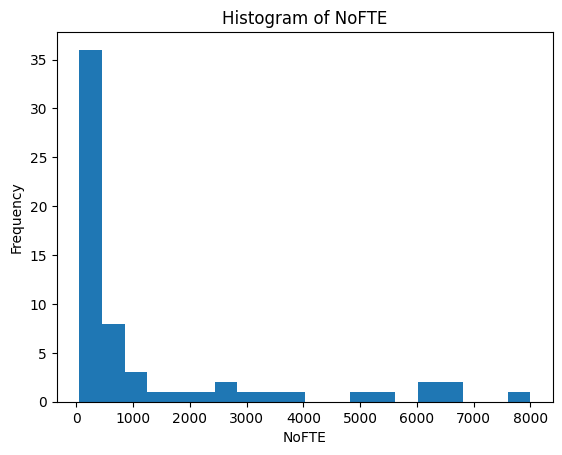

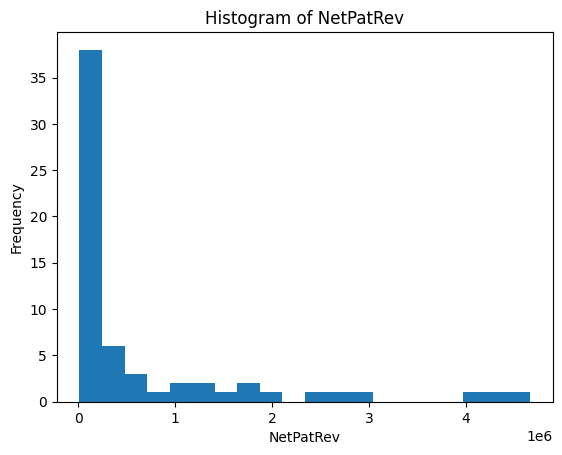

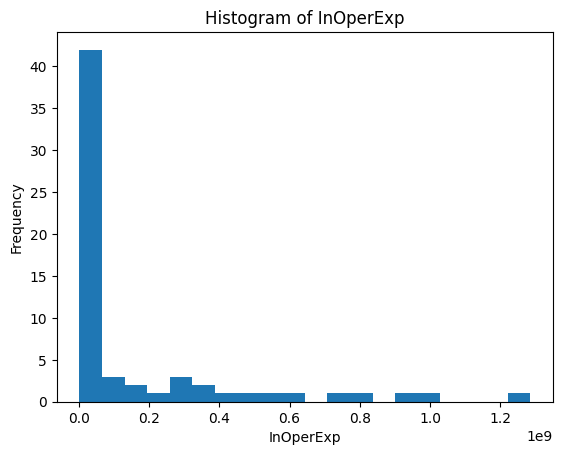

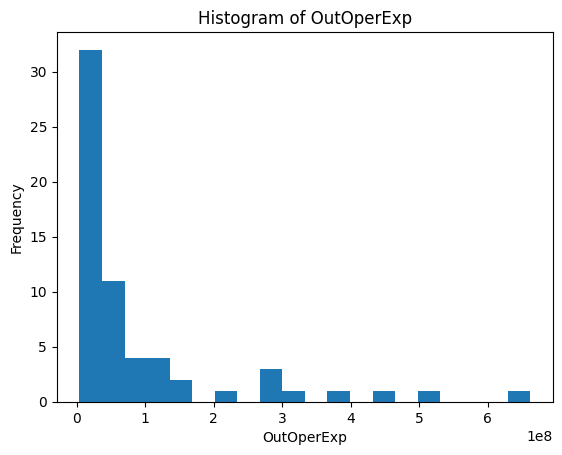

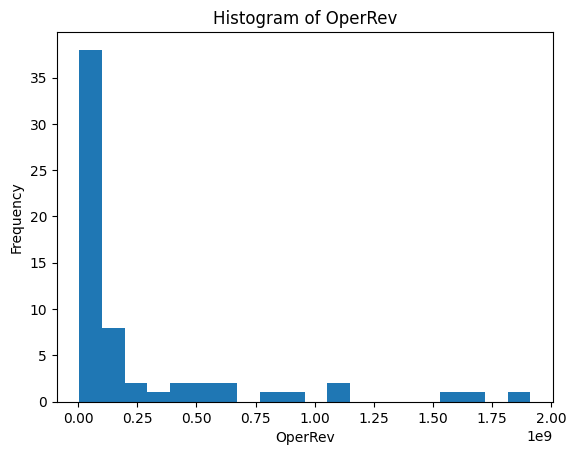

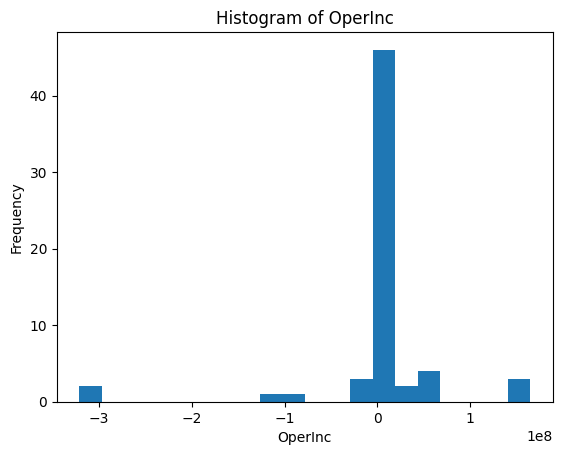

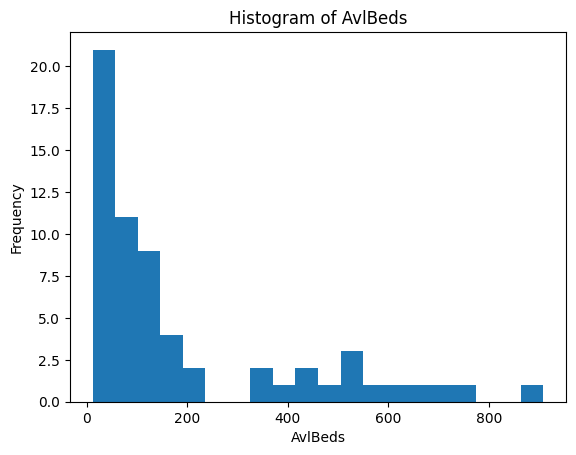

In [21]:
# Create histograms for key numeric variables
for col in ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']:
    plt.figure()
    plt.hist(merged_df[col].dropna(), bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## Net Patient Revenue vs. Predictors

We generate scatterplots to examine linearity and correlation trends between  
Net Patient Revenue and several continuous predictors. These visuals help  
identify potential relationships and detect outliers or heteroscedasticity.

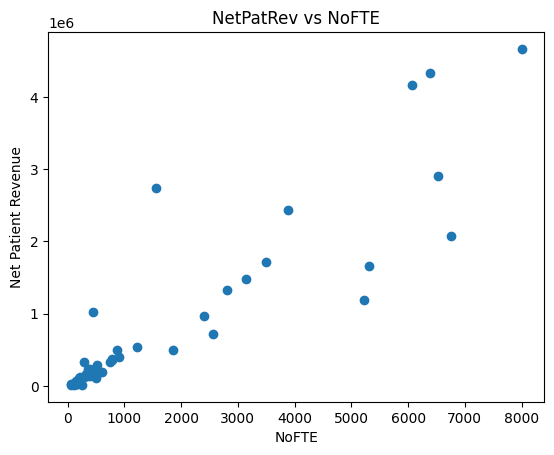

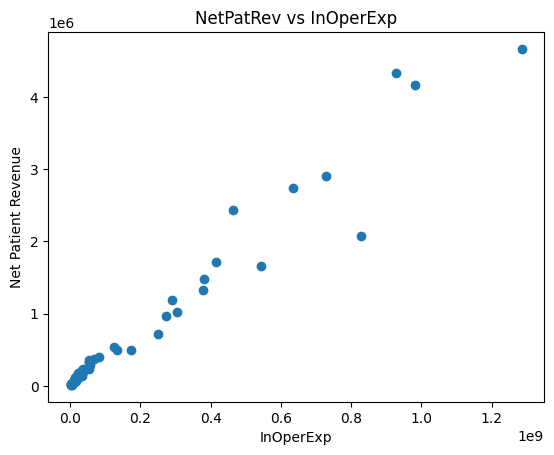

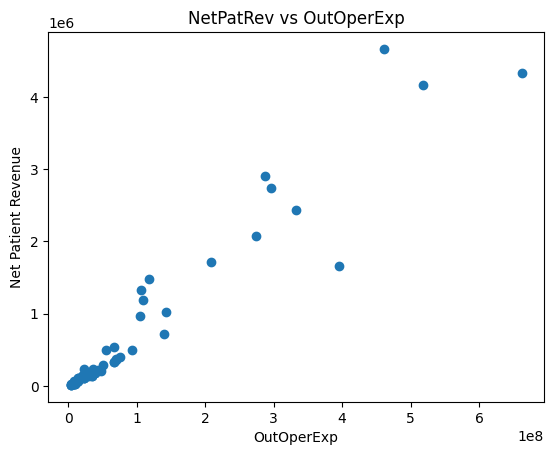

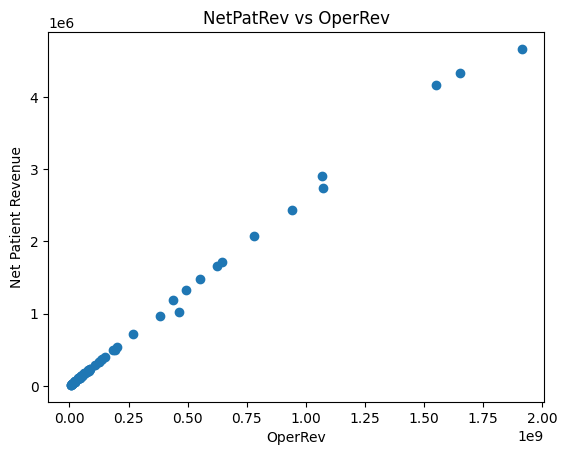

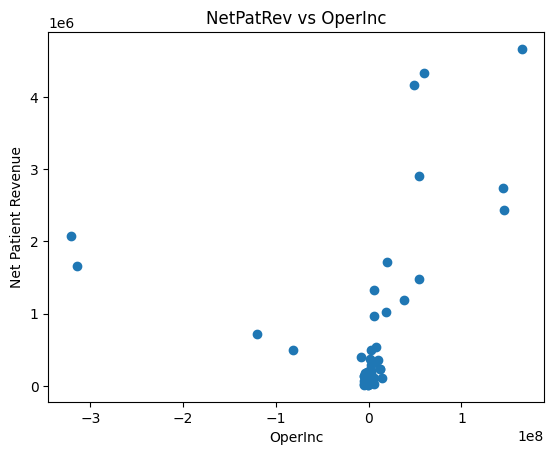

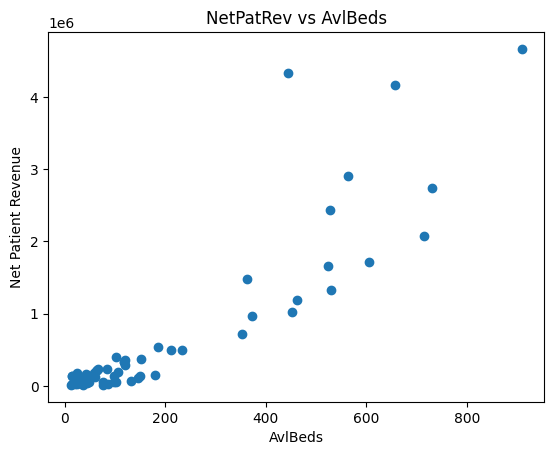

In [22]:
# Create scatterplots using NetPatRev as the y-axis
for col in ['NoFTE', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']:
    plt.figure()
    plt.scatter(merged_df[col], merged_df['NetPatRev'])
    plt.title(f'NetPatRev vs {col}')
    plt.xlabel(col)
    plt.ylabel('Net Patient Revenue')
    plt.show()

# Step 12: Boxplots
# Checking for potential outliers in key numeric variables using boxplots.

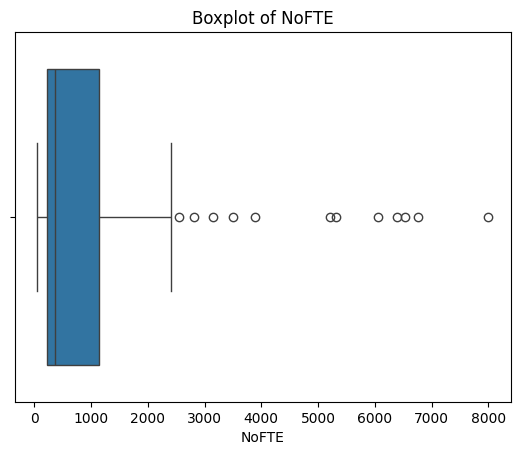

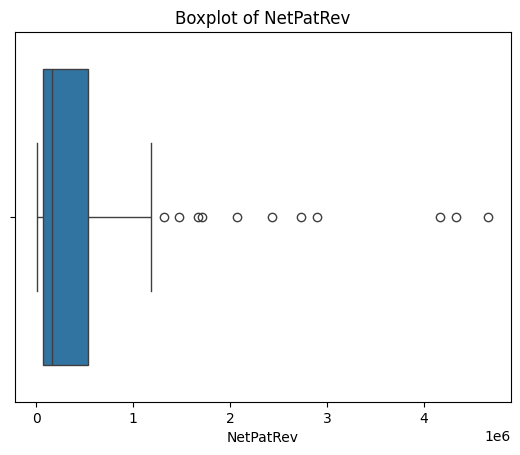

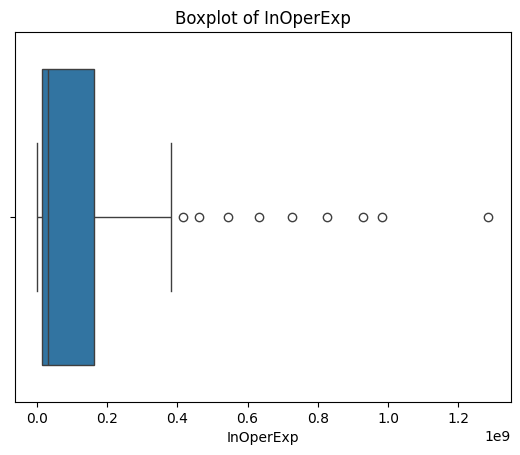

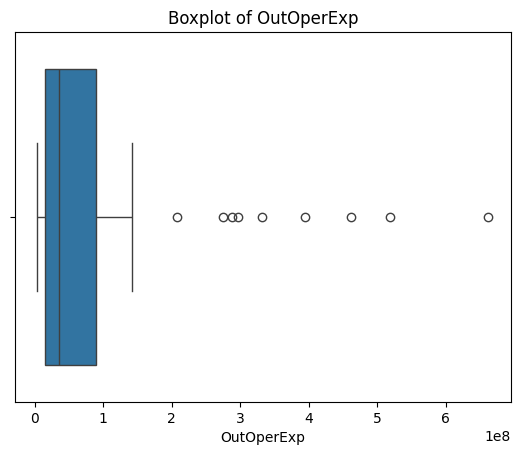

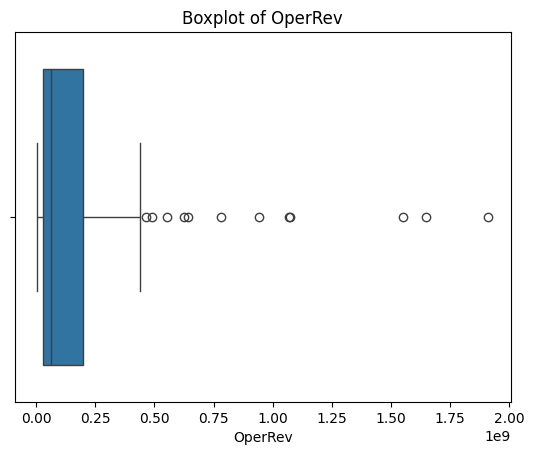

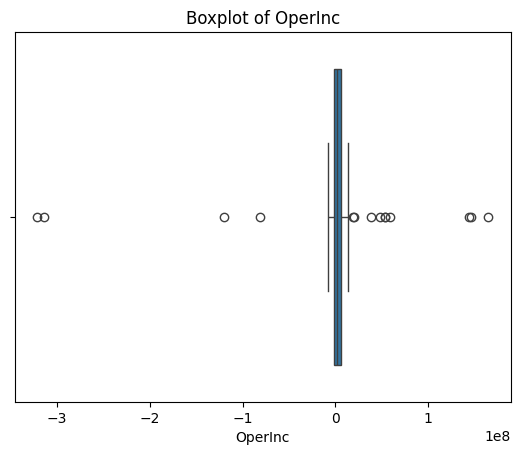

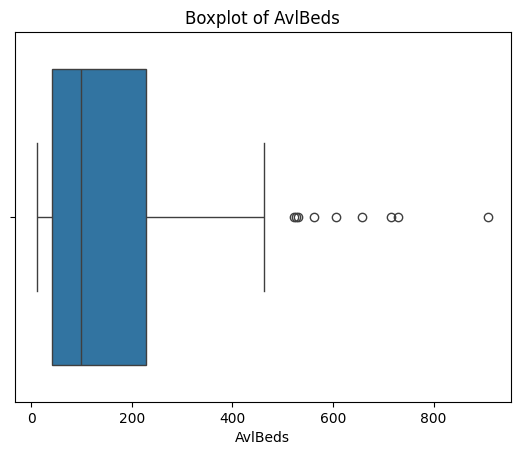

In [23]:
# Create boxplots for key numeric variables
for col in ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']:
    plt.figure()
    sns.boxplot(x=merged_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Boxplots for Outlier Detection

We use boxplots to examine the distribution and variance of key numeric variables,  
highlighting potential outliers and skewed ranges. These insights are essential for  
detecting anomalies and informing data transformations before modeling.


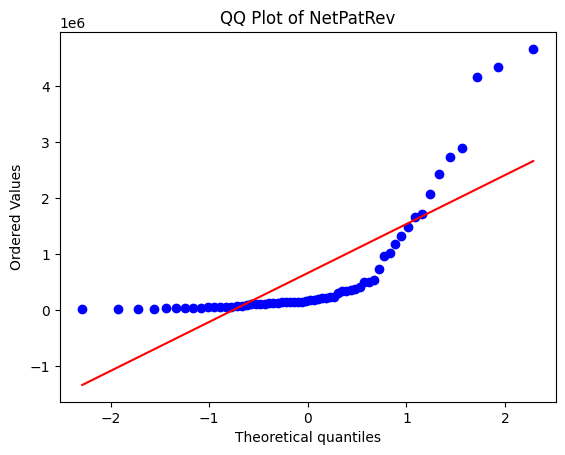

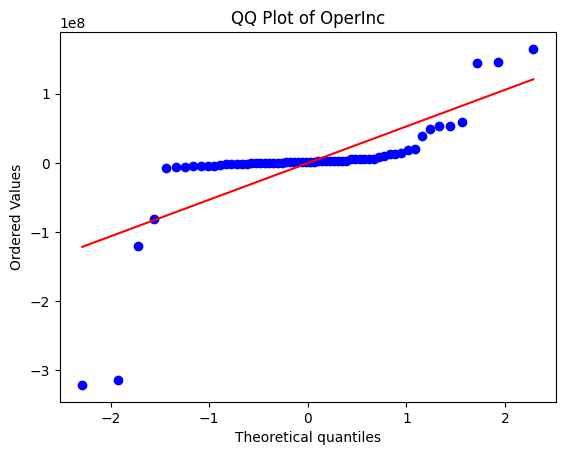

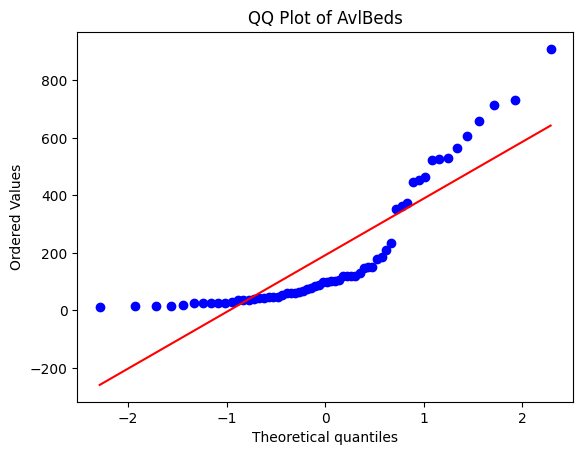

Shapiro-Wilk Test for NetPatRev: Statistic=0.619, p-value=0.000
Shapiro-Wilk Test for OperInc: Statistic=0.557, p-value=0.000
Shapiro-Wilk Test for AvlBeds: Statistic=0.759, p-value=0.000


In [24]:
# QQ Plots for selected variables
selected_cols = ['NetPatRev', 'OperInc', 'AvlBeds']

for col in selected_cols:
    plt.figure()
    stats.probplot(merged_df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {col}')
    plt.show()

# Shapiro-Wilk Tests for normality
for col in selected_cols:
    stat, p = shapiro(merged_df[col].dropna())
    print(f'Shapiro-Wilk Test for {col}: Statistic={stat:.3f}, p-value={p:.3f}')


## References

- UM-BGEN632 – Week 7 Instructor-Led Lab Instructions  
- Newton, O. B. (2025). *Instructor Tutorial: DataFrames & Descriptive Statistics in Python*  
- pandas documentation: https://pandas.pydata.org/  
- matplotlib documentation: https://matplotlib.org/stable/contents.html  
- scipy.stats documentation: https://docs.scipy.org/doc/scipy/reference/stats.html  

## Visual References: Handling KeyError after DataFrame Merge

The following figures summarize best practices from DeepSeek AI regarding  
managing missing columns after merging datasets in pandas.

---

### Figure 1: Why KeyErrors Happen After Merge

![Why KeyErrors Happen](assets/r1.png)

---

### Figure 2: Choosing Between `errors='ignore'` and Pre-checking Columns

![Choosing Drop Strategy](assets/r2.png)

---

### Figure 3: Safe Alternatives to Drop Columns Without Errors

![Safe Column Drop Techniques](assets/r3.png)

---